Mean:  25.80277171419891
Lambda:  0.0014601849203202159
C:  0.02155901889684258


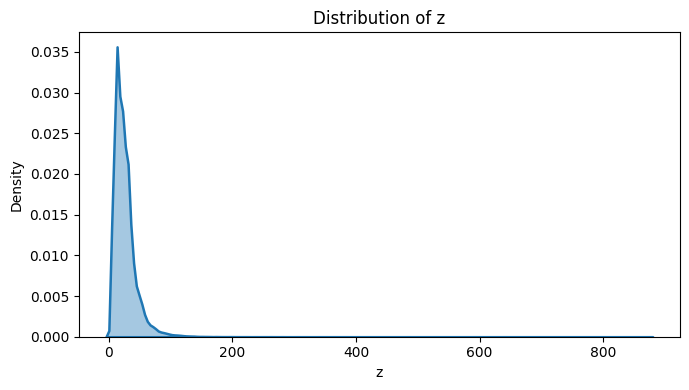

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../input/india-air-quality-data/data.csv',encoding='latin1',low_memory=False)
x = pd.to_numeric(df['no2'], errors='coerce').dropna().values

r = 102317240

ar = 0.05 * (r % 7)
br = 0.3 * (r % 5 + 1)

z = x + ar * np.sin(br * x)

mu = np.mean(z)
sigma2 = np.var(z)

lam = 1 / (2 * sigma2)
c = math.sqrt(lam / math.pi)

print("Mean: ",mu)
print("Lambda: ",lam)
print("C: ",c)

z_sorted = np.sort(z)
pdf = c * np.exp(-lam * (z_sorted - mu)**2)

plt.figure(figsize=(7,4))

sns.kdeplot(z, fill=True, alpha=0.4, linewidth=1.8)

plt.title("Distribution of z")
plt.xlabel("z")
plt.ylabel("Density")

plt.tight_layout()
plt.show()